In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [66]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def get_month_index(month):
    return months.index(month)+1

In [67]:
raw_data = pd.read_csv('model1_data.csv', converters={'arrival_date_month': get_month_index},parse_dates=['reservation_status_date'])
raw_data.rename(columns={'arrival_date_year':'arrival_year', 'arrival_date_month':'arrival_month', 
'arrival_date_day_of_month':'arrival_day_of_month', 'arrival_date_week_number':'arrival_week_number'}, inplace=True)
pd.set_option('display.max_columns', None)
city_data = raw_data.copy(deep=True)

In [68]:
raw_data.head()

,hotel,is_canceled,lead_time,arrival_year,arrival_month,arrival_week_number,arrival_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,245,2016,6,25,17,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,75.00,0,0,Canceled,2016-02-09
1,City Hotel,0,16,2015,10,40,1,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,107.00,0,0,Check-Out,2015-10-03
2,City Hotel,0,96,2016,6,25,13,1,1,3,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,159.30,0,2,Check-Out,2016-06-15
3,City Hotel,1,249,2016,10,43,22,2,2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,Non Refund,10.0,NaN,20,Transient,80.75,0,0,Canceled,2016-03-07
4,City Hotel,1,44,2016,2,8,17,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,44.0,NaN,3,Transient,75.00,0,0,Canceled,2016-01-16


In [69]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35670 entries, 0 to 35669
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           35670 non-null  object        
 1   is_canceled                     35670 non-null  int64         
 2   lead_time                       35670 non-null  int64         
 3   arrival_year                    35670 non-null  int64         
 4   arrival_month                   35670 non-null  int64         
 5   arrival_week_number             35670 non-null  int64         
 6   arrival_day_of_month            35670 non-null  int64         
 7   stays_in_weekend_nights         35670 non-null  int64         
 8   stays_in_week_nights            35670 non-null  int64         
 9   adults                          35670 non-null  int64         
 10  children                        35669 non-null  float64       
 11  ba

### Preprocessing

In [70]:
# Null Handling

# children : mode
# country : mode
# agent : category
# company : category

# children_mode = city_data.children.mode()
# city_data['children'].fillna(children_mode, inplace=True)

# country_mode = city_data.country.mode()
# city_data['country'].fillna(country_mode, inplace=True)

city_data.agent.fillna(0, inplace=True)

city_data.company.fillna(0, inplace=True)

city_data.dropna(inplace=True)

In [71]:
def get_date(year,month,day):
    return str(year) + '-' + str(month) + '-' + str(day)

city_data['arrival_date'] = city_data.apply(lambda x: get_date(x['arrival_year'], x['arrival_month'], x['arrival_day_of_month']), axis=1)
city_data['arrival_date'] = pd.to_datetime(city_data['arrival_date'], format='%Y-%m-%d')
city_data['arrival_day_of_week'] = city_data['arrival_date'].dt.day_of_week

city_data['booking_date'] = city_data.apply(lambda x: x['arrival_date'] - timedelta(days=x['lead_time']), axis=1)
city_data['booking_year'] = city_data['booking_date'].dt.year
city_data['booking_month'] = city_data['booking_date'].dt.month
city_data['booking_day_of_month'] = city_data['booking_date'].dt.day
city_data['booking_day_of_week'] = city_data['booking_date'].dt.day_of_week
city_data['booking_week_number'] = city_data['booking_date'].dt.isocalendar().week

# def get_month_day(date):
#     return str(date)[5:]

# city_data['arrival_day_month'] = city_data.apply(lambda x: get_month_day(x['arrival_date']), axis=1)


# city_data['booked'] = 1

city_data['arrival_day_of_week'] = city_data['arrival_date'].dt.dayofweek

# city_data['cancel_lead_time'] = (city_data['arrival_date'] - city_data['reservation_status_date']).dt.days
# city_data.loc[city_data ['cancel_lead_time'] < 0, 'cancel_lead_time'] = 0

# city_data['stay_duration'] = (city_data['reservation_status_date'] - city_data['arrival_date']).dt.days


def family(value):
    if value > 0:
        return 1
    else:
        return 0

city_data['is_family'] = city_data.apply(lambda x: family(x['children'] + x['babies']), axis=1)

In [72]:
import math

timeseries_labels = ['arrival_month','arrival_week_number','arrival_day_of_month','arrival_day_of_week',
                'booking_month', 'booking_week_number', 'booking_day_of_month', 'booking_day_of_week']

for label in timeseries_labels:
    city_data[label + "_norm"] = 2 * math.pi * city_data[label] / city_data[label].max()
    city_data["cos_" + label] = np.cos(city_data[label + "_norm"])
    city_data["sin_" + label] = np.sin(city_data[label + "_norm"])

    city_data.drop(labels=[label + '_norm', label], axis=1, inplace=True)

In [73]:
city_data.drop(labels=['adr','reservation_status','reservation_status_date','arrival_date','arrival_year','booking_date','hotel'],axis=1,inplace=True)

In [74]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35661 entries, 0 to 35669
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     35661 non-null  int64  
 1   lead_time                       35661 non-null  int64  
 2   stays_in_weekend_nights         35661 non-null  int64  
 3   stays_in_week_nights            35661 non-null  int64  
 4   adults                          35661 non-null  int64  
 5   children                        35661 non-null  float64
 6   babies                          35661 non-null  int64  
 7   meal                            35661 non-null  object 
 8   country                         35661 non-null  object 
 9   market_segment                  35661 non-null  object 
 10  distribution_channel            35661 non-null  object 
 11  is_repeated_guest               35661 non-null  int64  
 12  previous_cancellations          

In [75]:
city_data

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,booking_year,is_family,cos_arrival_month,sin_arrival_month,cos_arrival_week_number,sin_arrival_week_number,cos_arrival_day_of_month,sin_arrival_day_of_month,cos_arrival_day_of_week,sin_arrival_day_of_week,cos_booking_month,sin_booking_month,cos_booking_week_number,sin_booking_week_number,cos_booking_day_of_month,sin_booking_day_of_month,cos_booking_day_of_week,sin_booking_day_of_week
0,1,245,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,12.0,0.0,0,Transient,0,0,2015,0,-1.000000,1.224647e-16,-0.984231,0.176890,-0.954139,-0.299363,-0.5,-8.660254e-01,5.000000e-01,-0.866025,0.263587,-0.964636,-0.994869,-0.101168,-0.5,-8.660254e-01
1,0,16,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Contract,0,0,2015,0,0.500000,-8.660254e-01,0.029633,-0.999561,0.979530,0.201299,-1.0,1.224647e-16,-1.836970e-16,-1.000000,-0.205979,-0.978556,-0.994869,0.101168,0.5,8.660254e-01
2,0,96,1,1,3,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,0,2,2016,0,-1.000000,1.224647e-16,-0.984231,0.176890,-0.874347,0.485302,1.0,0.000000e+00,6.123234e-17,1.000000,0.375828,0.92669,-0.250653,0.968077,-0.5,8.660254e-01
3,1,249,2,2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,Non Refund,10.0,0.0,20,Transient,0,0,2016,0,0.500000,-8.660254e-01,0.375828,-0.926690,-0.250653,-0.968077,0.5,-8.660254e-01,5.000000e-01,0.866025,0.674983,0.737833,-0.994869,-0.101168,0.5,8.660254e-01
4,1,44,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,44.0,0.0,3,Transient,0,0,2016,0,0.500000,8.660254e-01,0.582979,0.812487,-0.954139,-0.299363,-0.5,8.660254e-01,8.660254e-01,0.500000,0.992981,0.118273,0.688967,0.724793,1.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35665,0,215,0,1,2,3.0,0,BB,GBR,Direct,Direct,0,0,0,G,G,0,No Deposit,14.0,0.0,0,Transient,0,1,2017,1,-0.500000,-8.660254e-01,-0.630088,-0.776524,0.347305,-0.937752,-0.5,-8.660254e-01,8.660254e-01,0.500000,0.93742,0.348202,-0.250653,-0.968077,1.0,-2.449294e-16
35666,1,229,1,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0.0,0.0,0,Transient,0,0,2016,0,-0.866025,-5.000000e-01,-0.984231,-0.176890,-0.758758,0.651372,-0.5,8.660254e-01,8.660254e-01,-0.500000,0.757511,-0.652822,0.347305,-0.937752,-0.5,-8.660254e-01
35667,0,0,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,180.0,0.0,0,Transient,1,0,2016,0,0.866025,5.000000e-01,0.889657,0.456629,-0.758758,-0.651372,0.5,8.660254e-01,8.660254e-01,0.500000,0.93742,0.348202,-0.758758,-0.651372,0.5,8.660254e-01
35668,0,53,1,1,2,0.0,0,BB,ESP,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,0,0,2015,0,-0.500000,-8.660254e-01,-0.533823,-0.845596,0.151428,-0.988468,1.0,0.000000e+00,-8.660254e-01,-0.500000,-0.998244,-0.059241,0.918958,0.394356,-1.0,1.224647e-16


### Feature Engineering

In [76]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [77]:
cat_columns = ['meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
                'deposit_type','customer_type']

cat_data = city_data[cat_columns]

In [78]:
## Scaling numerical data

num_data = city_data.drop(labels=cat_columns+['is_canceled'],axis=1)
columns = num_data.columns

std_scaler = StandardScaler().fit(num_data)
num_data = std_scaler.transform(num_data)
num_data.shape

(35661, 33)

In [79]:
## Encoding categorical data

onehot_encoder = OneHotEncoder(sparse=True).fit(cat_data)
cat_data = onehot_encoder.transform(cat_data).toarray()
cat_data.shape

(35661, 163)

In [80]:
## Combining numerical and categorical data

columns = columns.to_list()

for cat in onehot_encoder.categories_:
    columns.extend(cat)

encoded_data = np.concatenate((num_data,cat_data),axis=1)
encoded_data.shape

(35661, 196)

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_reduced = pca.fit_transform(encoded_data)

## Reduced dimensions from 196 to 50 with 99% variance ratio

In [82]:
pca.explained_variance_ratio_

array([0.09952484, 0.0773752 , 0.06295232, 0.05571589, 0.04882056,
       0.04307352, 0.03819512, 0.03437702, 0.0323481 , 0.03118381,
       0.03027068, 0.0290064 , 0.02851067, 0.02811797, 0.0271579 ,
       0.02591585, 0.02548762, 0.02435382, 0.02381042, 0.02326021,
       0.02233768, 0.0209441 , 0.02042072, 0.01847546, 0.01640642,
       0.01416798, 0.01246291, 0.01133468, 0.00909202, 0.00759096,
       0.00708698, 0.00575568, 0.00550201, 0.00466152, 0.00323681,
       0.00258479, 0.00249517, 0.00202684, 0.00178655, 0.00164076,
       0.00161568, 0.00153489, 0.00145469, 0.00129522, 0.00125551,
       0.0009965 , 0.0008928 , 0.00087146, 0.00070512, 0.00063481])

<AxesSubplot:>

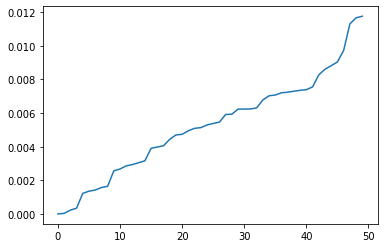

In [83]:
corr_data = pd.DataFrame(X_reduced)
corr_data['is_canceled'] = city_data['is_canceled']

correlation = corr_data.corr()
correlation = correlation['is_canceled']
correlation.drop('is_canceled',axis=0,inplace=True)
correlation = correlation.apply(np.abs)
# correlation.sort_values(ascending=False,inplace=True)
values = correlation.values
values.sort()
values
sns.lineplot(x=correlation.index, y=values)

### Data Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = X_reduced
y = city_data['is_canceled']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24962, 50), (24962,), (10699, 50), (10699,))

### Model Building

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,confusion_matrix,f1_score


In [89]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(3,3))
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [96]:
def test_model(model):
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('Train score:', model.score(X_train,y_train))
    print('F1 score (train):', f1_score(y_train, y_train_pred))

    print('Test score:', model.score(X_test,y_test))
    print('F1 score (val):', f1_score(y_test, y_test_pred))

    conf_matrix(y_test,y_test_pred)


In [91]:
import pickle

def create_pkl(model):
    filename = 'm1_' + str(model)[:-2] + '.pkl'
    pickle_out = open(filename,'wb')
    pickle.dump(model,pickle_out)
    pickle_out.close()
    print(f'Pkl File: {filename}')

Train score: 0.8003365114974762
F1 score (train): 0.7568543272514392
Test score: 0.798392373118983
F1 score (val): 0.7541319958965006


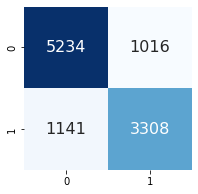

In [97]:
log_reg = LogisticRegression(class_weight='balanced', n_jobs=-1)
test_model(log_reg)

Train score: 0.995913788959218
F1 score (train): 0.9951050964583934
Test score: 0.7859613047948406
F1 score (val): 0.7432159677057637


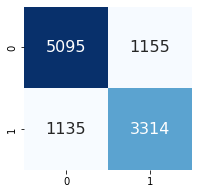

In [100]:
tree_clf = DecisionTreeClassifier(class_weight='balanced')
test_model(tree_clf)

Train score: 0.995913788959218
F1 score (train): 0.9951027463030535
Test score: 0.8469950462660062
F1 score (val): 0.7945789936002008


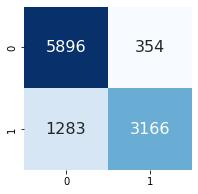

In [98]:
rnd_clf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
test_model(rnd_clf)

Train score: 0.8653553401169778
F1 score (train): 0.8366146516941325
Test score: 0.842882512384335
F1 score (val): 0.8088252018651201


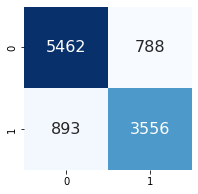

In [99]:
svc = SVC(class_weight='balanced')
test_model(svc)

SVC model with 80% Accuracy is selected